# Setup

In [83]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Getting the data

In [84]:
# If dataset is not downloaded, uncomment and run the two lines below.
#import kaggle
#!kaggle competitions download -c house-prices-advanced-regression-techniques -p datasets

In [85]:
df = pd.read_csv('datasets/train.csv')
OriginalData = df.copy()

# Discover and visualize the data to gain insight

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [89]:
dfId = df.Id

#### Lets check how things look in a heatmap of the correlation matrix

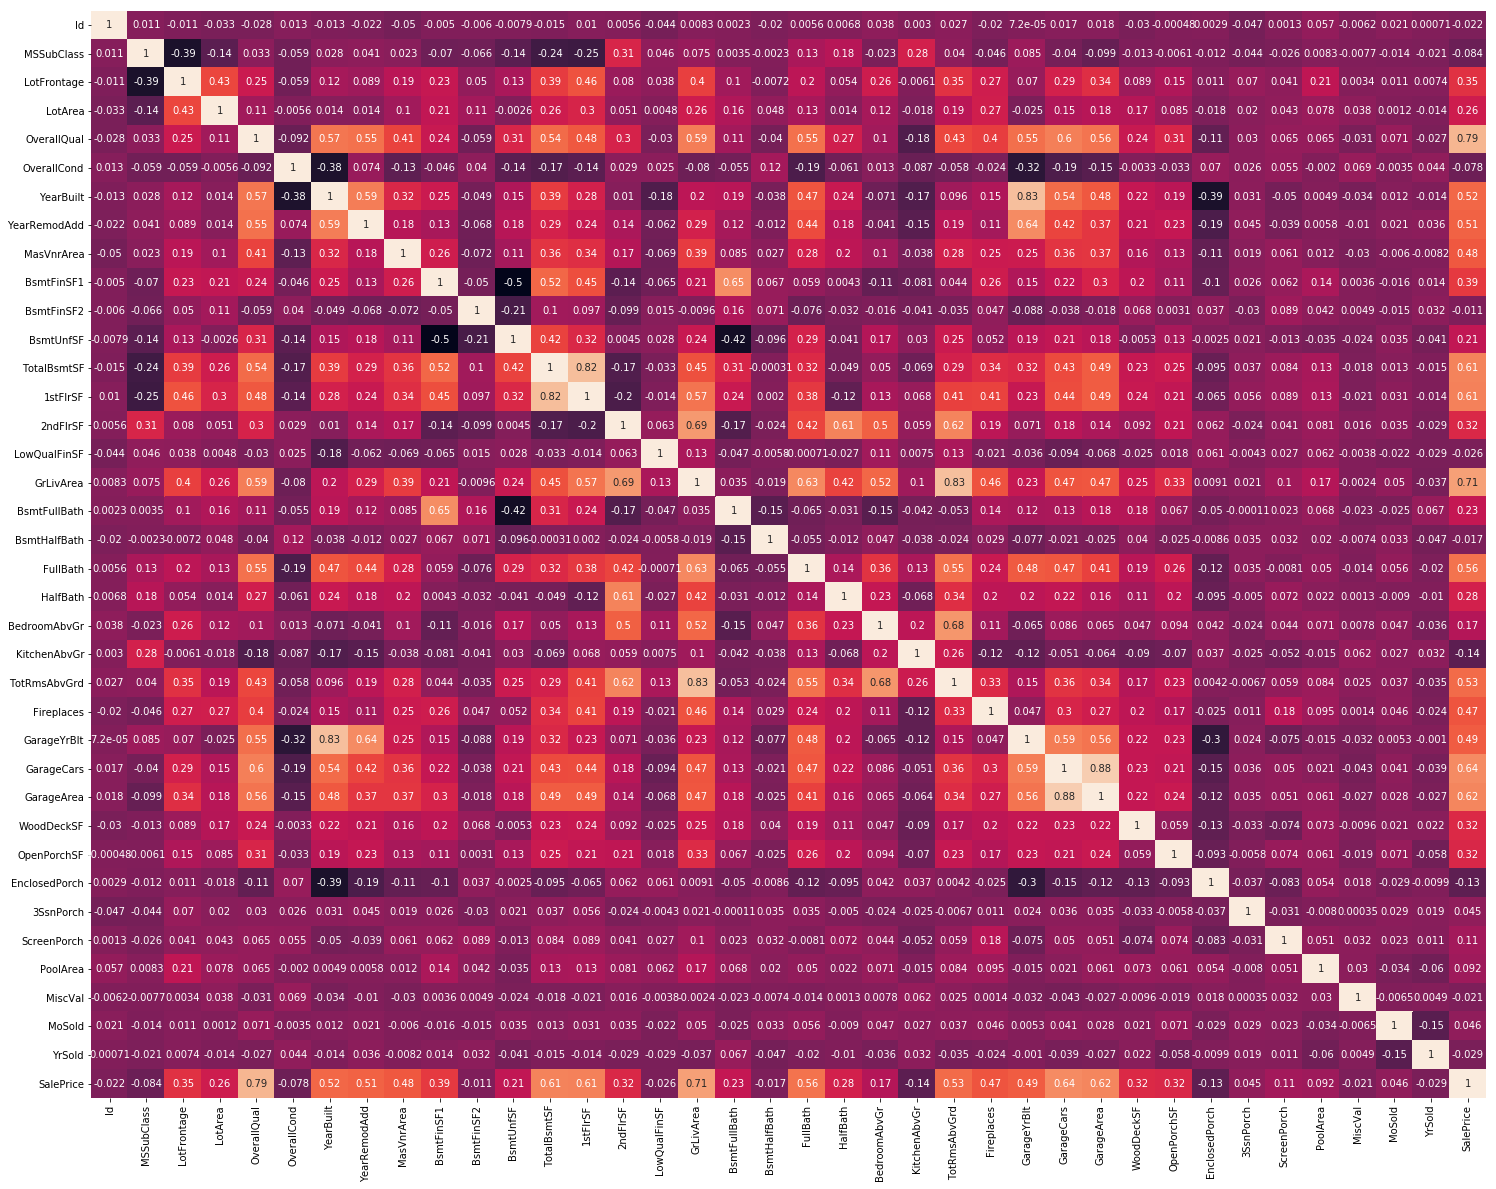

In [90]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cbar=False)

#### WOOOOW, that's overwelming. <br> Lets reduse the heatmap to the k attributes that are most correlated with saleprice

In [91]:
k = 10
sale_corr_cols = df.corr().nlargest(k,'SalePrice')['SalePrice'].index

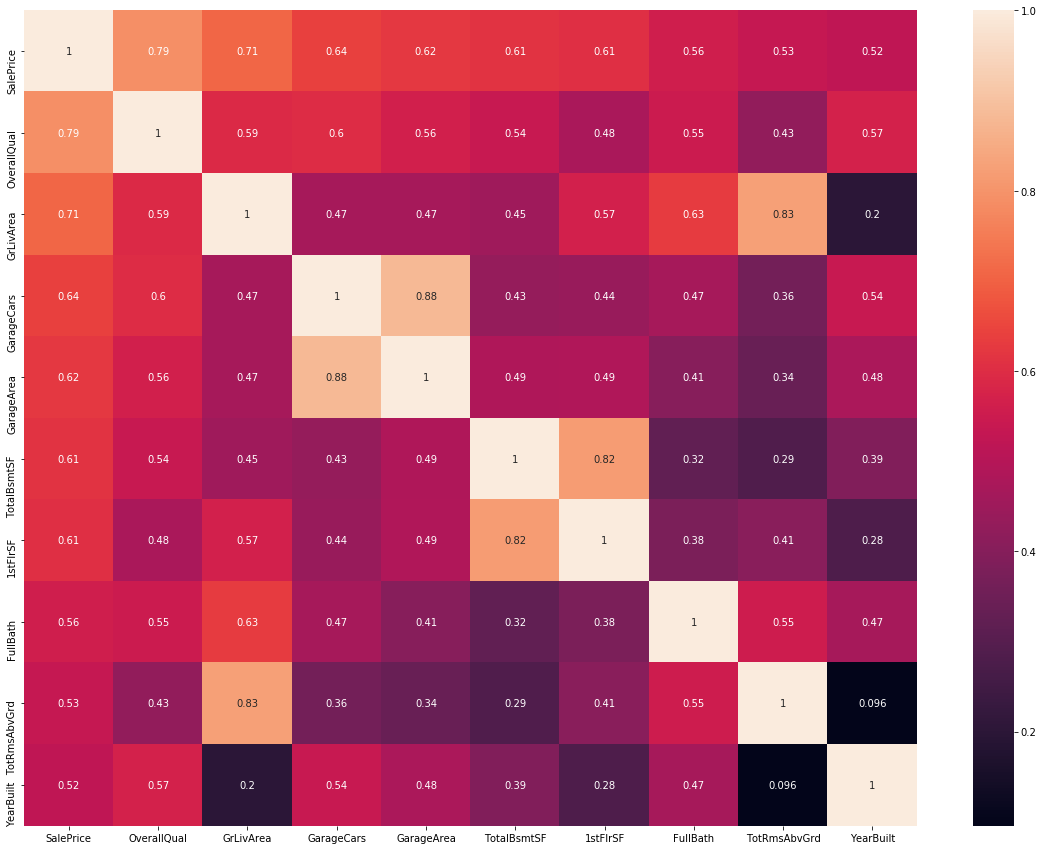

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(df[sale_corr_cols].corr(),annot=True)

#### That's better. <br> Here we see that Saleprice and OverallQual are highly correlated. <br> This is also clear in the pairplot below.

# Frequency of occurance on all objects in dataframe

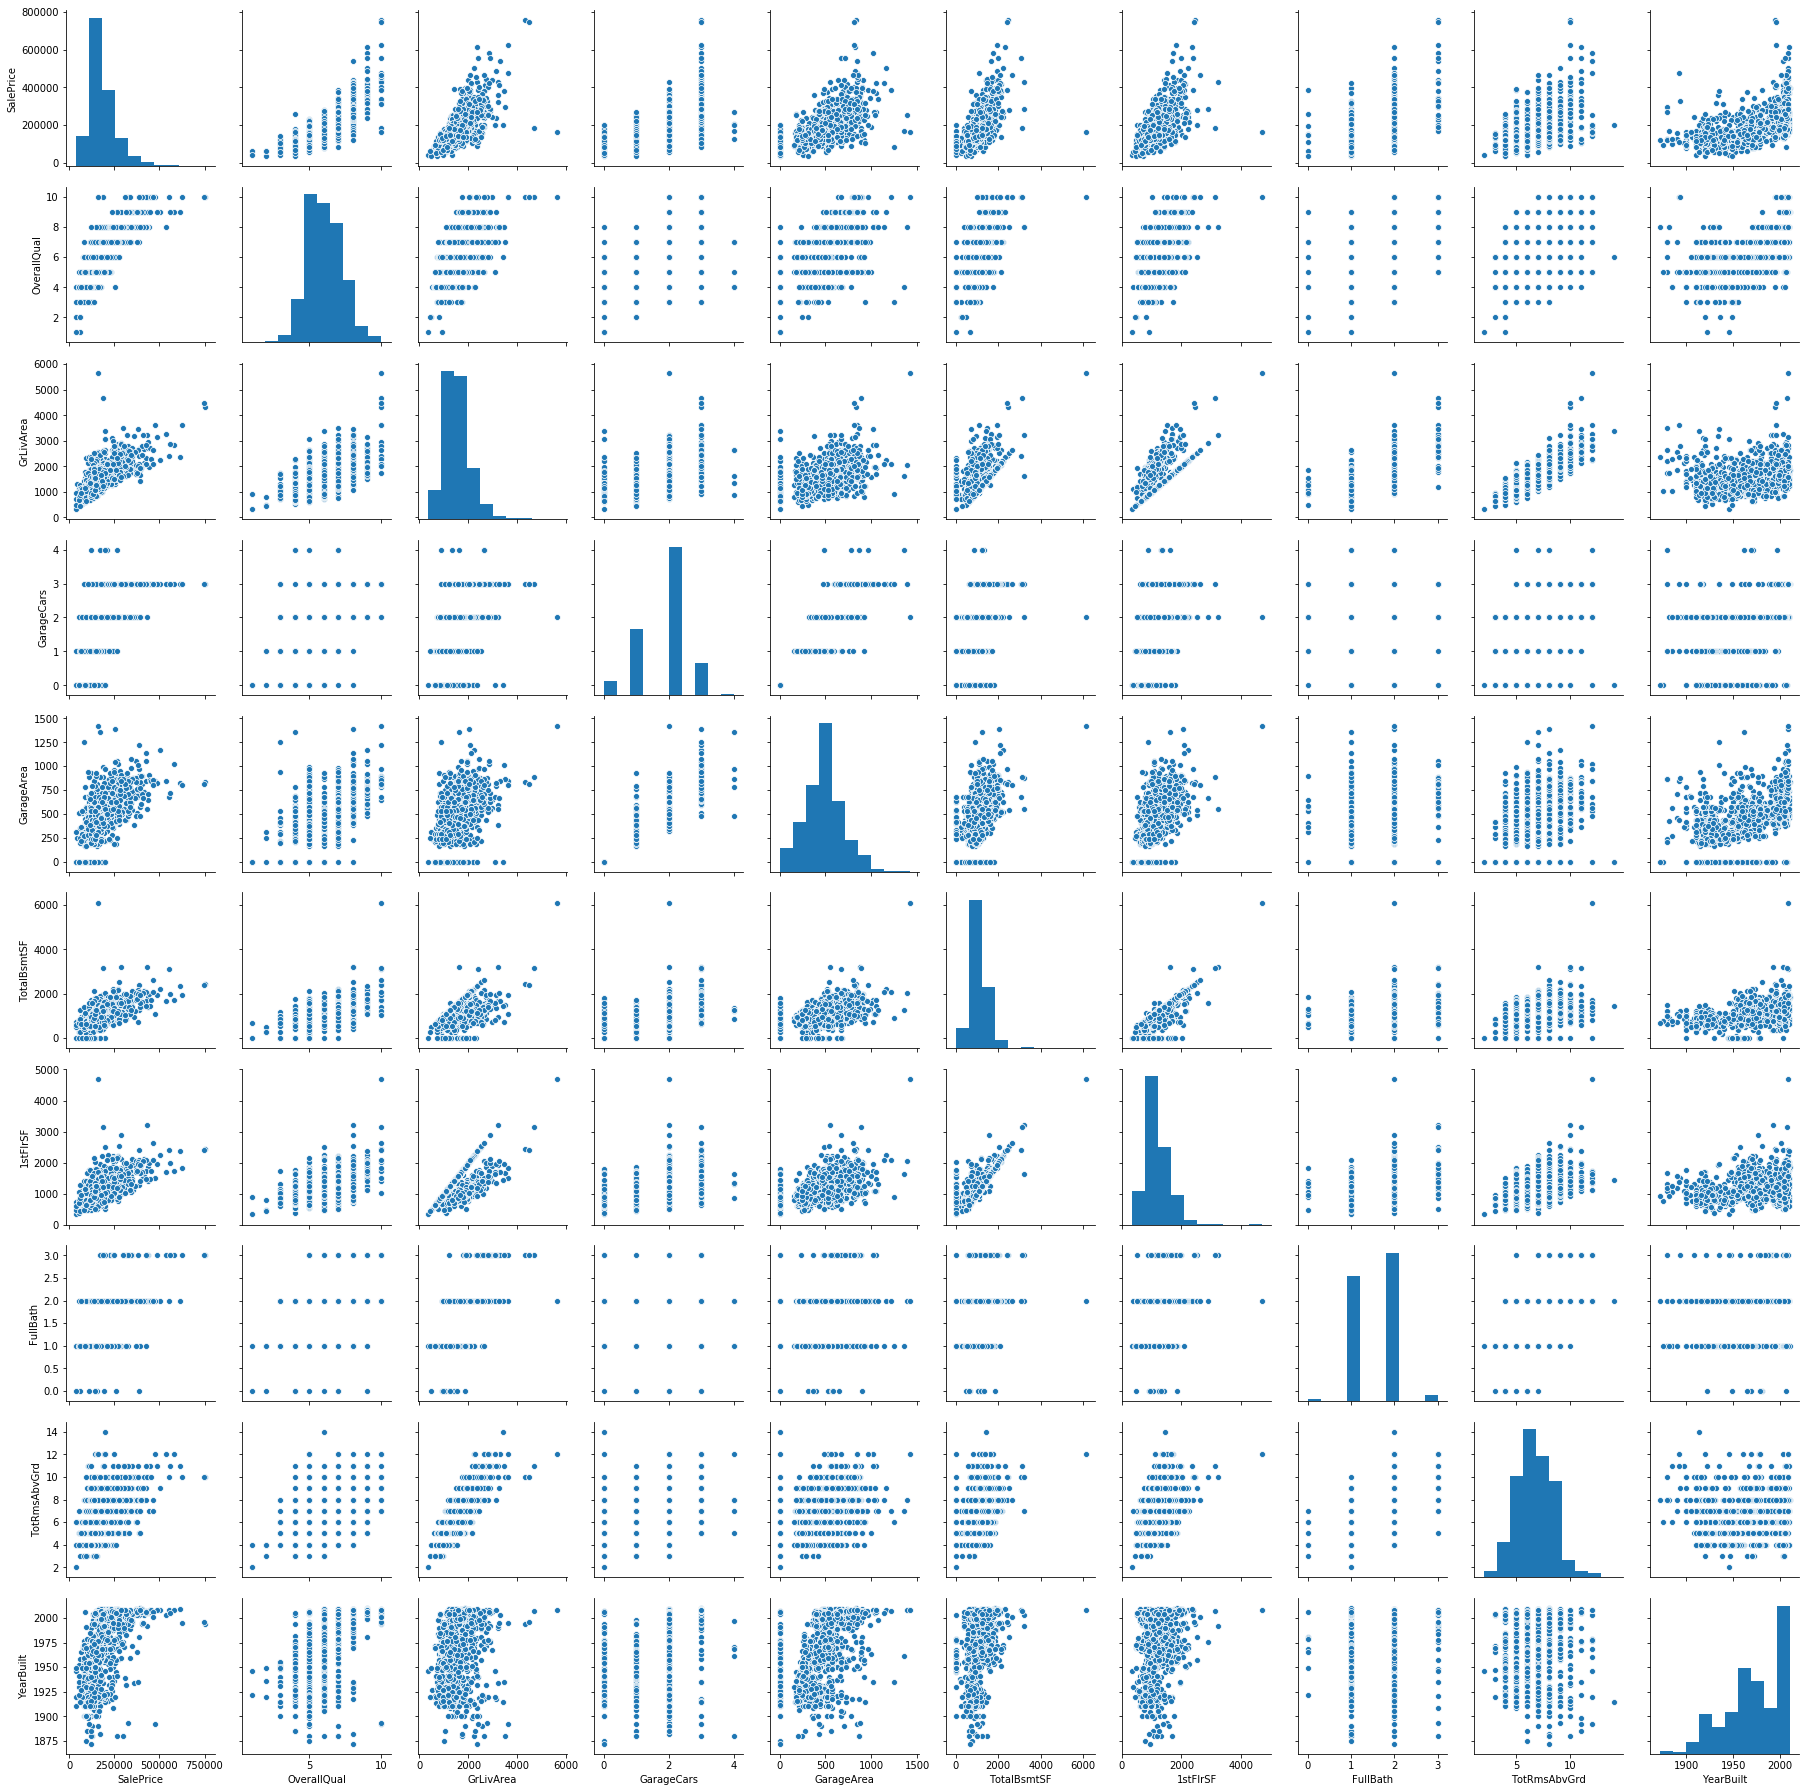

In [93]:
sns.pairplot(df[sale_corr_cols])

#### Let's display some of the scatterplots that seem to be related.

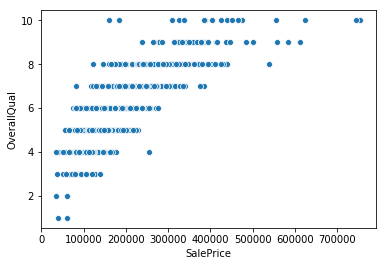

In [94]:
sns.scatterplot('SalePrice', 'OverallQual', data=df)

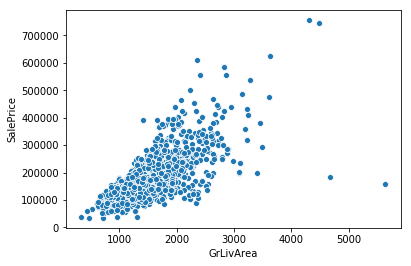

In [95]:
sns.scatterplot('GrLivArea', 'SalePrice', data=df)

In [96]:
#        sns.scatterplot('GrLivArea', 'SalePrice', data=df)

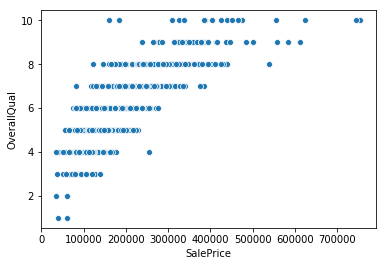

In [97]:
sns.scatterplot('SalePrice', 'OverallQual', data=df)

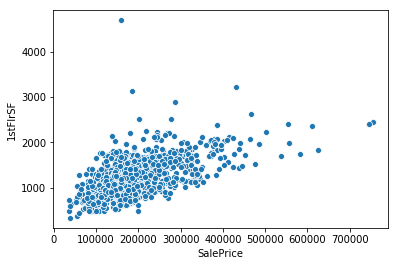

In [98]:
sns.scatterplot('SalePrice', '1stFlrSF', data=df)

# Prepare the data for Machine Learning algorithms

#### Putting all columns with missing values in a dataframe

In [99]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Dropping all columns with more than one missing value and the one entry <br> missing a value in the 'Electrical' column

In [100]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

#### Checking what type of output I get if I use the Pandas [Get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function <br> to handle values with 'Object' as datatype

In [101]:
pd.get_dummies(df).shape

(1459, 222)

#### Fixing numerical attributes that are really catagorical

In [102]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

#### Combining all data about squarefeet.

In [103]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

#### Using stratified split with the train_test_split to split the dataset into a training- and a validation-set

In [104]:
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SalePrice', axis=1), df.SalePrice, stratify=df.OverallQual, test_size=0.1, random_state=42)
#df['OverallQual'] = df['OverallQual'].astype(str)
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
#for train_index, test_index in split.split(df, df['OverallQual']):
#    strat_train_set = df.loc[train_index]
#    strat_test_set = df.loc[test_index]

#### Verifying that the split was somewhat accurate.<br> Here I could have used the train_test_split function from scikit-learn, but given that <br> the trainingset is so small it will probably be better to strategically split the data so that the <br> training and test sets have approximately the same amount of entries in them of the attribute most correlated with the saleprice.

In [105]:
df["OverallQual"].value_counts() / len(df)

5     0.271419
6     0.256340
7     0.218643
8     0.115147
4     0.079507
9     0.029472
3     0.013708
10    0.012337
2     0.002056
1     0.001371
Name: OverallQual, dtype: float64

In [106]:
X_train['OverallQual'].value_counts() / len(X_train)

5     0.271135
6     0.256664
7     0.218583
8     0.115004
4     0.079208
9     0.029703
3     0.013709
10    0.012186
2     0.002285
1     0.001523
Name: OverallQual, dtype: float64

In [107]:
X_train.head()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,1286,6000,6,1939,1950,0,0,780,780,825,...,0,0,0,1,0,0,0,0,1,0
569,570,7032,5,1979,1979,943,0,0,943,943,...,0,0,0,1,0,0,0,0,1,0
1190,1191,32463,4,1961,1975,1159,0,90,1249,1622,...,0,0,0,1,0,0,0,0,1,0
1067,1068,9760,6,1964,1964,674,106,0,780,798,...,0,0,0,1,0,0,0,0,1,0
1417,1418,16545,8,1998,1998,781,0,503,1284,1310,...,0,0,0,1,0,0,0,0,1,0


#### Function to return all columns with values that have object as a datatype. <br> Originally I used this function to pass the catagorical columns to the full_pipeline (declared below) with One_Hot_Encoder. <br> This was before I found the Get_Dummies function in Pandas. I was going to get rid of it, but I found another use for it in [CatBoost](https://catboost.ai/).

In [108]:
def objcolify(dataset):
    objcols = pd.Series()
    for i in dataset.columns:
        if dataset[i].dtype == 'O':
            objcols = objcols.append(pd.Series([i]), ignore_index=True)
    return objcols

#### Pipeline to handle numerical columns. I could have dropped the imputer, but I wasn't completely sure if I was going to drop the missing values. I ultimately decided to not use pipelines, even though it would be the wiser choice in a real world application.

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer      
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),                
    ])

#### Here I created a full_pipeline to handle both numerical and catagorical columns, but after I found the Get_Dummies function in Pandas, I removed the catagorical part with One_hot_encoder and just used the full_pipeline to call the num_pipeline above. 

In [110]:
from sklearn.compose import ColumnTransformer
num_attribs = list(X_train)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])


In [111]:
trainset_prepared = full_pipeline.fit_transform(X_train)
testset_prepared = full_pipeline.transform(X_test)    # CHECK OUT!!!!!!!!!!

#### Converting the prepared trainingset to a dataframe

In [112]:
#train = pd.DataFrame(trainset_prepared)
#test = pd.DataFrame(testset_prepared)
train=X_train
test=X_test

In [113]:
train.head()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1285,1286,6000,6,1939,1950,0,0,780,780,825,...,0,0,0,1,0,0,0,0,1,0
569,570,7032,5,1979,1979,943,0,0,943,943,...,0,0,0,1,0,0,0,0,1,0
1190,1191,32463,4,1961,1975,1159,0,90,1249,1622,...,0,0,0,1,0,0,0,0,1,0
1067,1068,9760,6,1964,1964,674,106,0,780,798,...,0,0,0,1,0,0,0,0,1,0
1417,1418,16545,8,1998,1998,781,0,503,1284,1310,...,0,0,0,1,0,0,0,0,1,0


#### Making a duplicate of the original labels before I alter it.

In [114]:
train.info()
y_train_original = y_train.copy
y_test_original = y_test.copy
y_train=y_train.reset_index().drop(columns='index')['SalePrice']
y_test=y_test.reset_index().drop(columns='index')['SalePrice']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1285 to 907
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: int64(31), uint8(228)
memory usage: 620.6 KB


#### Function for printing predictions and actual values (Labels)

In [115]:
def print_preds_labels(preds, labels):
    #labels = labels.reset_index().drop(columns='index')['SalePrice']
    print('Preds:                labels:')
    for i in range (len(preds)):
        print(preds[i], labels[i], sep='  #  ')

# Select and train model

#### Training a linear-regression model

In [116]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Testing the model om a small testset

In [117]:
some_data = X_train.iloc[:10]
some_labels = y_train.iloc[:10]
some_prepared_data = some_data#full_pipeline.transform(some_data)

preds = pd.Series(linreg.predict(some_prepared_data))
print_preds_labels(preds=preds, labels=some_labels)

Preds:                labels:
140193.4526977539  #  132500
134320.24725341797  #  135960
198953.20867919922  #  168000
185539.51434326172  #  167900
325795.2987060547  #  340000
338578.1653442383  #  314813
218071.71884155273  #  235128
164220.8132019043  #  163900
604511.3459472656  #  745000
159013.77908325195  #  146000


#### That's almost not that bad! <br> Lets check the RMSE and MAE.

In [118]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20661.149989952486

In [119]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

13853.716284932749

In [120]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [121]:
housing_predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=100)
rfg.fit(train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
housing_predictions = rfg.predict(train)
rfg_mse = mean_squared_error(y_train,housing_predictions)
rfg_rmse = np.sqrt(rfg_mse)
rfg_rmse

10663.998033338321

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train, y_train,
                         scoring="neg_mean_squared_error", cv=10)   # WHY NEGATIVE?????
tree_rmse_scores = np.sqrt(-scores)

In [125]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [42011.69434506 29567.04849396 28101.19226159 31385.62620394
 35226.16468139 35874.61014507 53976.12052191 31879.19725744
 46871.48061862 39840.42016011]
Mean: 37473.35546890854
Standard deviation: 7830.53999186841


In [126]:
rfg_scores = cross_val_score(rfg, train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
rfg_rmse_scores = np.sqrt(-rfg_scores)
display_scores(rfg_rmse_scores)

Scores: [31024.4087322  19195.75526665 15933.08983681 26557.75470234
 22276.09375442 30953.54857686 31420.07542316 22194.35970315
 46546.38548567 23223.5916902 ]
Mean: 26932.506317147177
Standard deviation: 8225.74103801855


In [127]:
print('Lin_reg: ', linreg.score(train, y_train))
print('Tree_reg: ', tree_reg.score(train,y_train))
print('Forest_reg: ', rfg.score(train,y_train))

Lin_reg:  0.9304024009957779
Tree_reg:  1.0
Forest_reg:  0.9814593314928927


#### So far the best model is the Randomforest.

### Let's try the well renowned CatBoost and XGBoost !

In [147]:
%%capture

from catboost import CatBoostRegressor

cbm = CatBoostRegressor(iterations=500, depth=3, learning_rate=0.1)
#cat_dims = [new_train_X.columns.get_loc(i) for i in new_objcols[:-1]] 
cbm.fit(train, y_train)#, eval_set=(test, y_test))

In [148]:
cbm_rmse = cbm.score(train,y_train)

In [149]:
cbm_rmse

18699.05092442643

In [150]:
import xgboost as xgb
from xgboost import XGBRegressor
dtrain = xgb.DMatrix(train, label=y_train, nthread=-1)
dtest = xgb.DMatrix(test, label=y_test, nthread=-1)

In [151]:
params = {
    'max_depth': 8,
    'min_child_weight': 10,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear'
}
params['eval_metric'] = 'rmse' # Root Mean square error

In [152]:
num_boost_round = 1500
early_stopping_rounds = 100

In [153]:
%%capture 
# Added capture to suppress the output 
cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, 
                    early_stopping_rounds=early_stopping_rounds, nfold=3, metrics=params['eval_metric'], 
                    stratified=True, seed=42)

In [154]:
cv_results[-25:]

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
16,29245.692058,10001.259779,11406.152669,2287.441066
17,29126.617188,9764.199075,11058.541341,2250.245841
18,28959.626953,9687.640259,10821.819987,2201.214028
19,29046.975261,9599.762048,10485.006022,2192.090730
20,29037.969401,9470.671522,10281.370768,2148.535396
21,28999.789714,9433.732460,10109.545248,2127.317517
22,28983.992188,9390.215133,9776.287109,2185.282283
23,29063.994140,9450.861981,9519.152669,2229.828386
24,29094.641276,9345.194926,9217.645996,2197.058237
25,29120.884765,9286.540506,9032.062663,2215.770619


In [155]:
cv_results['test-rmse-mean'].min() # Best result

28715.247396000002

In [156]:
cv_results['test-rmse-mean'].values.argmin() # in round #

40

### This is by far the worst model yet.. <br> Let's fine-tune

In [139]:
complexity_params = {
    'max_depth': range(3,7),
    'min_child_weight': range(3,8)
}

In [140]:
sampling_params = {
    'subsample': [i/10. for i in range(8,11)],
    'colsample_bytree': [i/10. for i in range(3,7)]
}

#### We add these parameters to a parameterGrid to "automate" things.

In [141]:
from sklearn.model_selection import ParameterGrid

complexity_param_grid = ParameterGrid(complexity_params)
sampling_param_grid = ParameterGrid(sampling_params)


In [142]:
%%capture

def param_optimizer(complexity_param_grid, sampling_param_grid):
    # Intial best parameters
    min_rmse = float("Inf")
    best_params = None
    # Code based on https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
    for current_params in complexity_param_grid:
    
        # Current settings
        md = current_params['max_depth']
        mcw = current_params['min_child_weight']
    
    
        # Use the current parameter settings
        params['max_depth'] = md
        params['min_child_weight'] = mcw
    
        # And evaluate them using cross-validation
        cv_results = xgb.cv(
            params, dtrain, num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds, 
            stratified=True, seed=42, nfold=3, metrics='rmse'
        )
        # If the score improved, we update the current best parameters:
        mean_rmse = cv_results['test-rmse-mean'].min()
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (md, mcw)
    print('RMSE: ', min_rmse)
    params['max_depth'], params['min_child_weight'] = best_params
    
    min_rmse = float("Inf")
    best_params = None
    
    # SUBSAMPLE
    
    for current_params in sampling_param_grid:
    
        # Current settings
        ss = current_params['subsample']
        csbt = current_params['colsample_bytree']
    
        # Use the current parameter settings
        params['subsample'] = ss
        params['colsample_bytree'] = csbt
    
        # And evaluate them using cross-validation
        cv_results = xgb.cv(
            params, dtrain, num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds, 
            stratified=True, seed=42, nfold=3, metrics='rmse'
        )
    
        # If the score improved, we update the current best parameters:
        mean_rmse = cv_results['test-rmse-mean'].min()
    
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (ss, csbt)
    
    params['subsample'], params['colsample_bytree'] = best_params
    print(min_rmse)

In [143]:
param_optimizer(complexity_param_grid, sampling_param_grid)

RMSE:  26745.592448333333
26524.915364666667


In [144]:
params

{'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 1.0,
 'colsample_bytree': 0.4,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

In [145]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test-rmse:149859
Will train until Test-rmse hasn't improved in 100 rounds.
[1]	Test-rmse:111687
[2]	Test-rmse:85088.2
[3]	Test-rmse:68439.9
[4]	Test-rmse:58150
[5]	Test-rmse:52071.3
[6]	Test-rmse:48830.5
[7]	Test-rmse:47818.3
[8]	Test-rmse:47163
[9]	Test-rmse:47011.2
[10]	Test-rmse:46640.8
[11]	Test-rmse:46944.9
[12]	Test-rmse:46590.6
[13]	Test-rmse:46293.2
[14]	Test-rmse:45994.7
[15]	Test-rmse:46390.2
[16]	Test-rmse:46664.4
[17]	Test-rmse:46543.3
[18]	Test-rmse:45773.6
[19]	Test-rmse:45701.8
[20]	Test-rmse:44742.9
[21]	Test-rmse:44717.1
[22]	Test-rmse:44343.5
[23]	Test-rmse:44473.2
[24]	Test-rmse:44459.3
[25]	Test-rmse:44400.5
[26]	Test-rmse:44402.3
[27]	Test-rmse:44367.4
[28]	Test-rmse:43818
[29]	Test-rmse:43770.9
[30]	Test-rmse:43911.9
[31]	Test-rmse:44085.2
[32]	Test-rmse:43990.5
[33]	Test-rmse:43953.1
[34]	Test-rmse:43904.4
[35]	Test-rmse:44136.7
[36]	Test-rmse:44186.1
[37]	Test-rmse:44142.1
[38]	Test-rmse:44357.4
[39]	Test-rmse:44215.4
[40]	Test-rmse:44223.3
[41]	Test-rmse:44

In [157]:
print('Lin_RMSE:    ', lin_rmse)
print('Tree_RMSE:   ', tree_rmse)
print('Forest_RMSE: ', rfg_rmse)
print('cbm_RMSE:    ', cbm_rmse)
print('xgb_RMSE:    ', cv_results['train-rmse-mean'].min())

Lin_RMSE:     20661.149989952486
Tree_RMSE:    0.0
Forest_RMSE:  10663.998033338321
cbm_RMSE:     18699.05092442643
xgb_RMSE:     6430.224120999999


### The ForestRegressor seems to be the way to go.

# Fine-tune the model

### Given that the improvement was in a negative direction and that I don't have the computing power or time to do further parameter testing <br> the solution Im providing is the is the base_model....

# Present your solution
The model I ended up with is the random forest. It gave the most promising result right of the bat, even though it didn't improve when I fine tuned the model with different hyperparameters. by using the models score function we see that our model represents about 98.2 percent of the dataset. This seems to good to be true, but there is a reason. Due to lack of time and last minute problems, I couldnt get the data to work with the evaluation set nor the test set. This however is not hard to fix, only timeconsuming. It is highly unlikely that the result would be as good.

# Launch, monitor and maintain your system
A system like this needs to be updated pretty regularly, e.g because of dollar fluctuation and trends that occur pretty random. To get input on when it needs more training it's normal to write a small program that monitors the performance of our model regularly and triggers an alert if the performance drops beyond what's reasonable in an instant or if it slowly degrades over time. E.g. the data we use today, will most likely be pretty useless in 10-15 years. it's not easy to write a program to assess your systems performance, so this is ususally done manually by human interactions and analysis. It's also important to check the quality and validity of input data being fed to the model. This could be caused by faulty sensors, corrupted data, etc.

# References

[Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook) <br>
[COMPREHENSIVE DATA EXPLORATION WITH PYTHON](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)<br>
[Using Grid Search to Optimise CatBoost Parameters](https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html)<br>
[Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)